In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
varinfo.clear()

In [4]:
import utils.weaverUtils as weaver
modelpath= '/eos/uscms/store/user/ekoenig/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/'

In [5]:
fc.sixb = fc.FileCollection('/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/')
f_signal = np.array([ f'{d}/ntuple.root' for d in fc.sixb.Official_NMSSM.ls if d.endswith('pythia8') ])
use_signal = [4]

In [6]:
signal = ObjIter([Tree([f], use_gen=True) for f in f_signal[use_signal]])

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


In [16]:
t.cutflow[0].histo

array([4.9278613e+15, 4.0542373e+15, 4.0483723e+15, 3.3947717e+15,
       1.9307640e+15, 1.8852571e+15], dtype=float32)

In [28]:
t = signal[0]

t.filelist[0].total_events

4927861328707584.0

In [29]:
type(t.filelist[0].xsec)

int

In [8]:
ddsignal.genWeight

[<Array [2.53e+10, 2.53e+10, ... 2.51e+10] type='74585 * float32'>]

In [46]:
load_feynnet = sixb.f_load_feynnet_assignment( modelpath, onnx=True )

signal.apply(load_feynnet, report=True)

f_load_feynnet_assignment: 100%|██████████| 1/1 [00:08<00:00,  8.46s/it]


[None]

In [47]:
signal.apply(sixb.assign)

[None]

In [57]:
(tree.nfound_select == 6)

0.3240329825031843

In [59]:
tree = signal[0]

ak.mean((tree.X_signalId == 0)[tree.nfound_select == 6]), ak.mean((tree.X_signalId == 0))


(0.46391923204237007, 0.150325132399276)

6it [00:00, 20.48it/s]                       


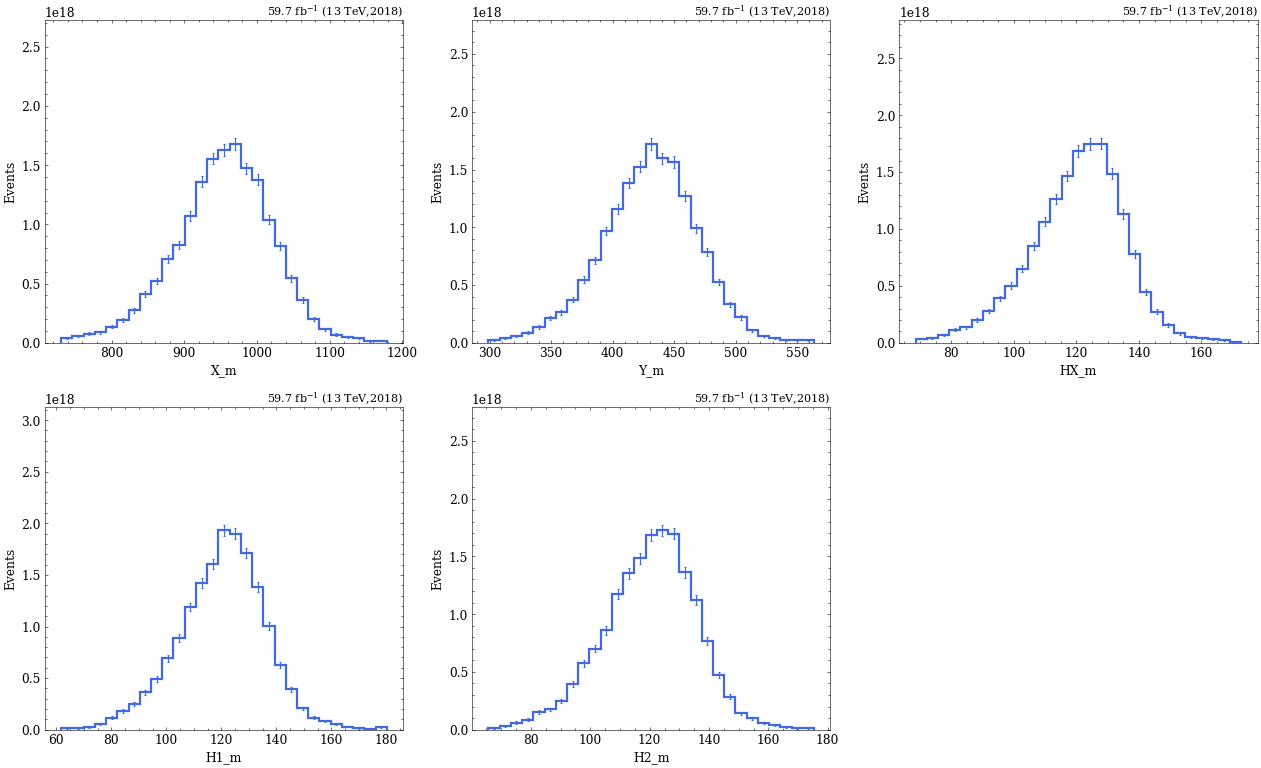

In [50]:
study.quick(
    signal,
    masks=lambda t : t.X_signalId == 0,
    varlist=['X_m','Y_m','HX_m','H1_m','H2_m'],
)

In [19]:
tree = signal[0]

In [25]:
tree.j_signalId[0], tree.jet_signalId[0]

(<Array [0, 1, 4, 5, 2, 3] type='6 * int32'>,
 <Array [4, 0, 2, 3, 1, 5] type='6 * int32'>)

In [30]:
tree.h_signalId[0]

<Array [0, 2, 1] type='3 * int64'>

In [37]:
yid = ak.where( (tree.h_signalId[:,1]>0)&(tree.h_signalId[:,2]>0), 0, -1)

In [42]:
ak.mean(yid==0)

0.1645773278809412

In [45]:
ak.where(yid == tree.h_signalId[:,0], yid, -1)

0.150325132399276

100%|██████████| 1/1 [00:00<00:00, 16.46it/s]


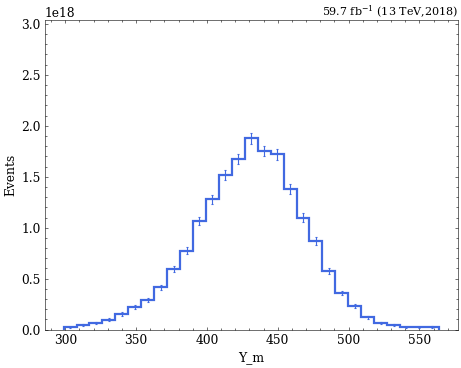

In [28]:
study.quick(
    signal,
    masks=lambda t : t.Y_signalId == 1,
    varlist=['Y_m']
)